In [97]:
import os
import pandas as pd

current_dir = os.getcwd()
data_path = current_dir + "/Data"
csv = os.listdir(data_path)
vegemite_file_path = os.path.join(data_path, "vegemite.csv")
vegemite_df = pd.read_csv(vegemite_file_path, index_col=None, header=0)
vegemite_df

FFTE Feed tank level SP  FFTE Production solids SP  \
0                         50.0                      40.74   
1                         50.0                      40.74   
2                         50.0                      40.74   
3                         50.0                      40.74   
4                         50.0                      39.00   
...                        ...                        ...   
15232                     50.0                      41.50   
15233                     50.0                      41.50   
15234                     50.0                      41.50   
15235                     50.0                      41.50   
15236                     50.0                      41.50   

       FFTE Steam pressure SP  TFE Out flow SP  TFE Production solids SP  \
0                       125.0          2897.65                      69.0   
1                       125.0          2897.65                      69.0   
2                       125.0          2897.65                      69.0   
3                       125.0          2897.65                      69.0   
4                        90.0          2694.62                      64.0   
...                       ...              ...                       ...   
15232                   135.0          1925.30                      71.0   
15233                   135.0          1925.30                      71.0   
15234                   135.0          1925.30                      71.0   
15235                   135.0          1925.30                      71.0   
15236                   135.0          1925.30                      71.0   

       TFE Vacuum pressure SP  TFE Steam pressure SP  \
0                      -80.00                  125.0   
1                      -79.45                  125.0   
2                      -71.54                  125.0   
3                      -68.44                  125.0   
4                      -80.00                  120.0   
...                       ...                    ...   
15232                  -63.12                  120.0   
15233                  -69.46                  120.0   
15234                  -68.95                  120.0   
15235                  -62.23                  120.0   
15236                  -52.04                  120.0   

       TFE Steam temperature SP  FFTE Feed flow SP  FFTE Out steam temp SP  \
0                          80.0            10130.0                   49.88   
1                          80.0            10130.0                   49.88   
2                          80.0            10130.0                   49.88   
3                          80.0            10130.0                   49.88   
4                          80.0             9300.0                   49.88   
...                         ...                ...                     ...   
15232                      80.0             9400.0                   50.40   
15233                      80.0             9400.0                   50.40   
15234                      80.0             9400.0                   50.40   
15235                      80.0             9400.0                   50.40   
15236                      80.0             9400.0                   50.40   

       ...  TFE Out flow PV  TFE Product out temperature  \
0      ...          2577.82                          0.0   
1      ...          1551.88                          0.0   
2      ...          1564.85                          0.0   
3      ...          1512.97                          0.0   
4      ...          1795.72                          0.0   
...    ...              ...                          ...   
15232  ...          4532.43                          0.0   
15233  ...          2680.29                          0.0   
15234  ...          1859.92                          0.0   
15235  ...          2590.14                          0.0   
15236  ...          2590.14                          0.0   

       TFE Production solids P

In [99]:
# Step 1: Data Preparation

from sklearn.model_selection import train_test_split

target_column = "Class"  # Change this if your class column has a different name

#shuffle dataset
vegemite_df = vegemite_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate classes
class_0 = vegemite_df[vegemite_df[target_column] == 0]
class_1 = vegemite_df[vegemite_df[target_column] == 1]
class_2 = vegemite_df[vegemite_df[target_column] == 2]

# Sample 300 from each class for the test set
test_0 = class_0.sample(n=350, random_state=42)
test_1 = class_1.sample(n=350, random_state=42)
test_2 = class_2.sample(n=300, random_state=42)

# Combine balanced test dataset
test_df = pd.concat([test_0, test_1, test_2])

# Remove selected test data from the training set
train_df = vegemite_df.drop(test_df.index)

# Save the new datasets
#test_df.to_csv("balanced_test_data.csv", index=False)
#train_df.to_csv("balanced_train_data.csv", index=False)

# Print class distributions
print("New test dataset size:", len(test_df))
print(test_df[target_column].value_counts())  # Check class balance
print("\nNew train dataset size:", len(train_df))
print(test_df.shape)
print(train_df.shape)

New test dataset size: 1000
0    350
1    350
2    300
Name: Class, dtype: int64

New train dataset size: 14237
(1000, 47)
(14237, 47)


In [3]:
constant_columns = [col for col in train_df.columns if train_df[col].nunique() == 1]
constant_columns

['TFE Steam temperature SP', 'TFE Product out temperature']

In [100]:
# remove constant columns (1.1)
light_train_df = train_df.drop(columns=constant_columns)
light_train_df.shape

(14237, 45)

In [5]:
# Print the number of unique values per column
print("Unique values per column:")
print(light_train_df.nunique())

# Print the data types of each column
print("\nData types of columns:")
print(light_train_df.dtypes)

Unique values per column:
FFTE Feed tank level SP             3
FFTE Production solids SP          12
FFTE Steam pressure SP           2177
TFE Out flow SP                    53
TFE Production solids SP           96
TFE Vacuum pressure SP           3143
TFE Steam pressure SP              62
FFTE Feed flow SP                  50
FFTE Out steam temp SP             12
Extract tank Level               5218
Extract tank Out flow PV          634
FFTE Discharge density             40
FFTE Discharge solids            1140
FFTE Feed flow rate PV            479
FFTE Feed tank level PV          1003
FFTE Heat temperature 1          1591
FFTE Heat temperature 2          1275
FFTE Heat temperature 3          1556
FFTE Out steam temp PV            203
FFTE Production solids PV        1517
FFTE Pump 1                         5
FFTE Pump 1 - 2                     4
FFTE Pump 2                         5
FFTE Steam pressure PV           1469
FFTE Temperature 1 - 1            747
FFTE Temperature 1 - 2  

In [101]:
# one hot encode categories (1.2)

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
columns_to_encode = ['FFTE Pump 1', 'FFTE Pump 1 - 2', 'FFTE Pump 2', 'TFE Motor speed', 'FFTE Feed tank level SP']

# Ensure the original DataFrame index is preserved
encoded_columns = encoder.fit_transform(light_train_df[columns_to_encode])

# Step 2: Convert the encoded columns to DataFrame
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode), index=light_train_df.index)

# Step 3: Concatenate with the original DataFrame (excluding the original columns to encode)
light_train_df_encoded = pd.concat([light_train_df.drop(columns=columns_to_encode), encoded_df], axis=1)

# Step 4: Display the result
print(light_train_df_encoded.shape)

(14237, 55)


In [8]:
# Check distribution for class (1.3)
class_distribution = light_train_df_encoded['Class'].value_counts()
print(class_distribution)

2    7248
1    4697
0    2292
Name: Class, dtype: int64


In [9]:
!pip install imbalanced-learn

In [10]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

X = light_train_df_encoded.drop('Class', axis=1)  # Features
y = light_train_df_encoded['Class']  # Target

# Step 1: Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 2: Apply Tomek Links for undersampling the majority class
tomek_links = TomekLinks()
X_final, y_final = tomek_links.fit_resample(X_resampled, y_resampled)

# Create a new balanced DataFrame
balanced_train_df = pd.DataFrame(X_final, columns=X.columns)
balanced_train_df['Class'] = y_final

# Checking the new class distribution
print(balanced_train_df['Class'].value_counts())

0    7248
1    7142
2    7124
Name: Class, dtype: int64


Matplotlib is building the font cache; this may take a moment.


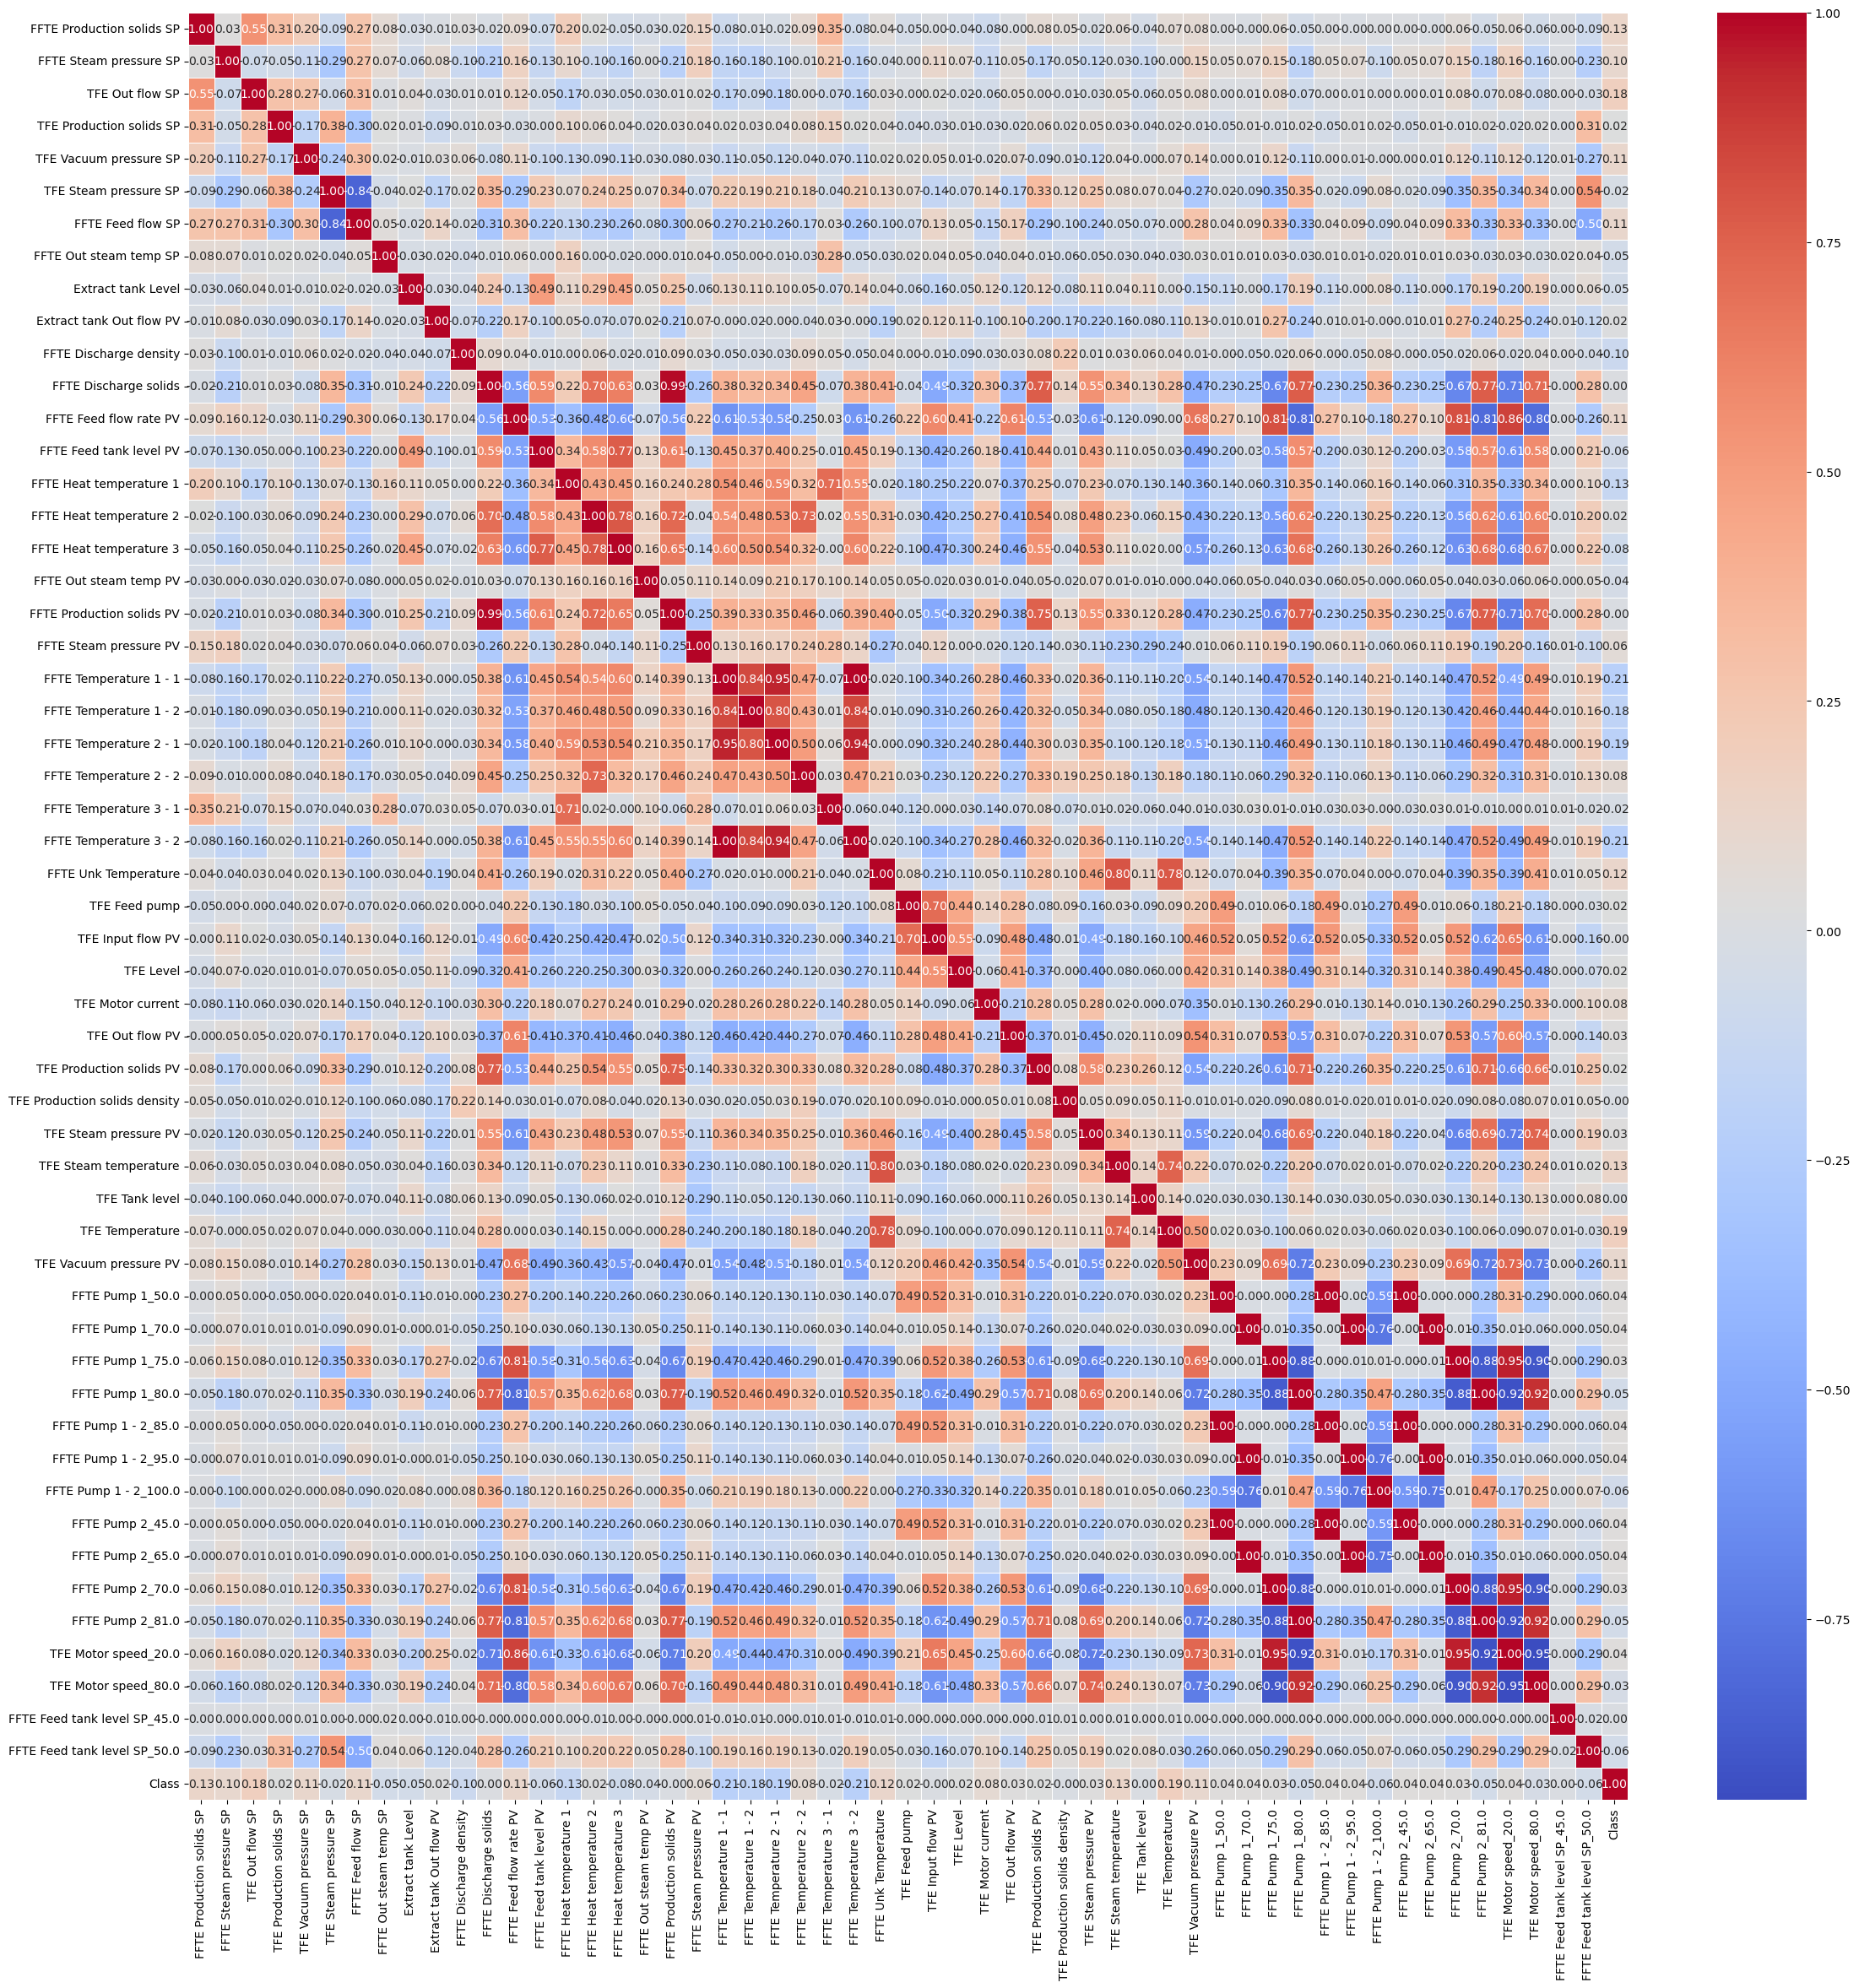

In [11]:
# explore correlations to find composite features (1.4)
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = balanced_train_df.corr()

num_features = correlation_matrix.shape[0]  # number of rows (or columns, since it's square)
fig_size = (num_features * 0.5, num_features * 0.5)  # You can adjust the multiplier (0.5) as needed

# Set up the matplotlib figure with dynamic size
plt.figure(figsize=fig_size)

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()

In [12]:
composite_train_df = balanced_train_df.copy()
composite_train_df['Feed tank level and Vacuum pressure Ratio'] = composite_train_df['FFTE Feed tank level PV'] / composite_train_df['TFE Vacuum pressure PV']
composite_train_df['Feed tank level and Production solids Ratio'] = composite_train_df['FFTE Feed tank level PV'] * composite_train_df['TFE Production solids PV']
composite_train_df['Feed tank level and TFE Out flow PV'] = composite_train_df['FFTE Feed tank level PV'] * composite_train_df['TFE Out flow PV']
composite_train_df['Feed pump and Level Ratio'] = composite_train_df['TFE Feed pump'] / composite_train_df['TFE Level']
composite_train_df['Temperature 2 - 1 and Out flow PV Ratio'] = composite_train_df['FFTE Temperature 2 - 1'] * composite_train_df['TFE Out flow PV']

In [28]:
# Step 2: Feature selection, Model Training and Evaluation

# alot of the features have very strong correlations with other features making them redundant, or
# there are many features that have no direct correlation with the target variable

from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

selector = SelectKBest(score_func=f_classif, k=40)
X_train_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]

X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_features, index=X.index)

print(X_train_selected_df.shape)

(21514, 40)


In [162]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import sys
from sklearn.preprocessing import StandardScaler

# Initialize models
models = {
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "SVC (Support Vector Classifier)": SVC(random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=100, random_state=42)
}

#scale data for SVC
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected_df)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_selected_df.columns, index=X_train_selected_df.index)

X_train, X_test, y_train, y_test = train_test_split(X_train_scaled_df, y, test_size=0.3, random_state=42)
#X_test = test_df.drop('Class', axis=1) 
#y_test = test_df['Class']  

trained_models = []

# Train and evaluate models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print model performance
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")
    
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:\n{cm}")
    
    print("="*50)
    
    trained_models.append((model_name, model))


DecisionTreeClassifier Accuracy: 96.25%
Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2206
           1       0.95      0.95      0.95      2118
           2       0.97      0.97      0.97      2131

    accuracy                           0.96      6455
   macro avg       0.96      0.96      0.96      6455
weighted avg       0.96      0.96      0.96      6455

Confusion Matrix for DecisionTreeClassifier:
[[2136   50   20]
 [  49 2019   50]
 [  18   55 2058]]
RandomForestClassifier Accuracy: 99.33%
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2206
           1       0.99      0.99      0.99      2118
           2       1.00      0.99      0.99      2131

    accuracy                           0.99      6455
   macro avg       0.99      0.99      0.99      6455
weighted avg 

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
# save best model
import joblib

# save the random forest model
joblib.dump(trained_models[1][1], 'best_model.pkl')

['best_model.pkl']

In [117]:
# Step 3: ML to AI

best_model = joblib.load('best_model.pkl')
best_model
print(test_df.shape)

(1000, 47)


In [108]:
light_test_df = test_df.drop(columns=constant_columns)
light_test_df.shape

(1000, 45)

In [147]:
y_test = light_test_df['Class']

encoder = OneHotEncoder(sparse_output=False)
columns_to_encode = ['FFTE Pump 1', 'FFTE Pump 1 - 2', 'FFTE Pump 2', 'TFE Motor speed', 'FFTE Feed tank level SP']

encoded_columns = encoder.fit_transform(light_test_df[columns_to_encode])

test_encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode), index=light_test_df.index)

test_encoded_df = pd.concat([light_test_df.drop(columns=columns_to_encode), test_encoded_df], axis=1)
test_encoded_df.shape

(1000, 56)

In [148]:
composite_test_df = test_encoded_df.copy()
composite_test_df['Feed tank level and Vacuum pressure Ratio'] = composite_test_df['FFTE Feed tank level PV'] / composite_test_df['TFE Vacuum pressure PV']
composite_test_df['Feed tank level and Production solids Ratio'] = composite_test_df['FFTE Feed tank level PV'] * composite_test_df['TFE Production solids PV']
composite_test_df['Feed tank level and TFE Out flow PV'] = composite_test_df['FFTE Feed tank level PV'] * composite_test_df['TFE Out flow PV']
composite_test_df['Feed pump and Level Ratio'] = composite_test_df['TFE Feed pump'] / composite_test_df['TFE Level']
composite_test_df['Temperature 2 - 1 and Out flow PV Ratio'] = composite_test_df['FFTE Temperature 2 - 1'] * composite_test_df['TFE Out flow PV']
composite_test_df.head()

FFTE Production solids SP  FFTE Steam pressure SP  TFE Out flow SP  \
9524                        40.5                  122.47          2296.30   
13386                       43.0                  126.72          2255.81   
13801                       42.0                  126.51          2214.29   
5773                        42.0                  110.00          2214.29   
2294                        43.0                  121.03          2609.30   

       TFE Production solids SP  TFE Vacuum pressure SP  \
9524                       62.0                  -80.00   
13386                      68.0                  -80.00   
13801                      71.0                  -79.38   
5773                       63.0                  -44.63   
2294                       71.0                  -71.04   

       TFE Steam pressure SP  FFTE Feed flow SP  FFTE Out steam temp SP  \
9524                   125.0             9300.0                   50.00   
13386                  120.0            10000.0                   50.10   
13801                  120.0             9300.0                   50.33   
5773                   125.0             9300.0                   50.00   
2294                   120.0            10200.0                   50.33   

       Extract tank Level  Extract tank Out flow PV  ...  TFE Motor speed_0.0  \
9524                65.46                      1.46  ...                  0.0   
13386               63.96                      1.56  ...                  0.0   
13801               68.02                     20.97  ...                  0.0   
5773                69.65                     12.62  ...                  0.0   
2294                32.36                      6.17  ...                  0.0   

       TFE Motor speed_20.0  TFE Motor speed_80.0  \
9524                    0.0                   1.0   
13386                   0.0                   1.0   
13801                   0.0                   1.0   
5773                    0.0                   1.0   
2294                    0.0                   1.0   

       FFTE Feed tank level SP_25.0  FFTE Feed tank level SP_50.0  \
9524                            0.0                           1.0   
13386                           0.0                           1.0   
13801                           0.0                           1.0   
5773                            0.0                           1.0   
2294                            0.0                           1.0   

       Feed tank level and Vacuum pressure Ratio  \
9524                                   -0.928835   
13386                                  -0.720011   
13801                                  -0.628218   
5773                                   -0.690225   
2294                                   -0.752141   

       Feed tank level and Production solids Ratio  \
9524                                     3135.0975   
13386                                    3676.3962   
13801                                    3181.1766   
5773                                     3216.8380   
2294                                     3403.9480   

       Feed tank level and TFE Out flow PV  Feed pump and Level Ratio  \
9524                            74755.9200                   0.413493   
13386                          149088.8338                   0.449415   
13801                          127668.0006                   0.444840   
5773                            86983.6054                   0.604230   
2294                            81728.2012                   0.493746   

       Temperature 2 - 1 and Out flow PV Ratio  
9524                                97205.0112  
13386                              185963.7467  
13801                              161754.2430  
5773                               116399.0106  
2294                               105736.5872  

[5 rows x 61 columns]

In [149]:
composite_test_df_y = composite_test_df['Class'] 
composite_test_df_X = composite_test_df.drop('Class', axis=1) 

common_columns = X_train_selected_df.columns.intersection(composite_test_df_X.columns)
X_test_filtered = composite_test_df_X[common_columns]

In [150]:
X_test_scaled = scaler.transform(X_test_filtered)

In [151]:
predictions = best_model.predict(X_test_scaled)

In [156]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f"Classification Report for best model:\n{classification_report(y_test, predictions)}")

Accuracy: 99.90%
Classification Report for best model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       350
           2       1.00      1.00      1.00       300

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [157]:
models = {
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "SVC (Support Vector Classifier)": SVC(random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=100, random_state=42)
}

X_train, X_test, y_train, y_test = train_test_split(X_test_scaled, y_test, test_size=0.3, random_state=42)

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print model performance
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}")
    
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:\n{cm}")
    
    print("="*50)

DecisionTreeClassifier Accuracy: 70.00%
Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       110
           1       0.70      0.68      0.69       103
           2       0.62      0.60      0.61        87

    accuracy                           0.70       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.70      0.70      0.70       300

Confusion Matrix for DecisionTreeClassifier:
[[88  9 13]
 [14 70 19]
 [14 21 52]]
SVC (Support Vector Classifier) Accuracy: 58.33%
Classification Report for SVC (Support Vector Classifier):
              precision    recall  f1-score   support

           0       0.60      0.85      0.70       110
           1       0.55      0.36      0.44       103
           2       0.58      0.52      0.55        87

    accuracy                           0.58       300
   macro avg       0.58      0.57      0.56       300
weighted avg 

In [164]:
# Step 4: Develop rules from the ML model

columns_to_keep = [col for col in X_train_selected_df.columns if col.endswith('SP')]
X_train_only_sp = X_train_scaled_df[columns_to_keep]

FFTE Production solids SP  FFTE Steam pressure SP  TFE Out flow SP  \
0                       1.097681                0.243686         0.524690   
1                      -0.249887               -1.114269        -0.951111   
2                      -1.148266               -0.188391        -0.741848   
3                      -1.148266                0.428862        -1.095420   
4                       1.097681               -1.731521         1.270283   
...                          ...                     ...              ...   
21509                  -0.249887                1.046114        -0.951111   
21510                   1.097681               -1.183260         1.513935   
21511                   1.097681                0.794532         0.533625   
21512                  -0.249887                0.692530        -0.951111   
21513                  -2.495835                0.473660        -1.366248   

       TFE Production solids SP  TFE Vacuum pressure SP  FFTE Feed flow SP  \
0                      0.452769                0.947281           0.244528   
1                      0.172887               -1.055552          -0.427784   
2                     -1.611359                1.464943          -0.554776   
3                      0.032946               -0.779767          -0.427784   
4                     -4.025339                1.581737           0.117536   
...                         ...                     ...                ...   
21509                 -4.025339                1.204981           3.008477   
21510                  0.756172                1.324306           0.117536   
21511                  0.717362               -1.013228           0.169827   
21512                  0.102917                0.150304          -0.427784   
21513                  0.102917               -1.055552          -0.427784   

       FFTE Out steam temp SP  
0                    0.211172  
1                    0.149180  
2                    0.149180  
3                    0.149180  
4                   -0.222773  
...                       ...  
21509                0.149180  
21510               -4.650038  
21511                0.317927  
21512                0.149180  
21513                0.149180  

[21514 rows x 7 columns]

In [168]:
from sklearn.tree import DecisionTreeClassifier, export_text

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_only_sp, y)

tree_rules = export_text(clf, feature_names=list(X_train_only_sp.columns))
print(tree_rules)

|--- FFTE Feed flow SP <= 0.17
|   |--- FFTE Feed flow SP <= -0.56
|   |   |--- FFTE Production solids SP <= -0.59
|   |   |   |--- FFTE Production solids SP <= -1.82
|   |   |   |   |--- FFTE Steam pressure SP <= -0.34
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- FFTE Steam pressure SP >  -0.34
|   |   |   |   |   |--- TFE Vacuum pressure SP <= -0.98
|   |   |   |   |   |   |--- FFTE Steam pressure SP <= 0.16
|   |   |   |   |   |   |   |--- TFE Out flow SP <= 0.57
|   |   |   |   |   |   |   |   |--- TFE Production solids SP <= -0.39
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |--- TFE Production solids SP >  -0.39
|   |   |   |   |   |   |   |   |   |--- TFE Production solids SP <= -0.28
|   |   |   |   |   |   |   |   |   |   |--- FFTE Steam pressure SP <= -0.03
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- FFTE Steam pressure SP >  -0.03
|   |   |   |   |   |   |   |   |   |   